In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'DLTR'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-08-01,2031,-1337,694,121,468,0,1084,1664,170,...,524,0,0,783,740,1682,167,-88,207.0,2014-09-05
1,2014-11-01,2095,-1370,725,133,408,0,1305,1797,169,...,545,0,0,867,757,1783,23,-94,207.0,2014-12-06
2,2015-01-31,2476,-1558,918,206,864,0,1036,1995,165,...,434,0,0,862,683,1708,554,-71,207.0,2015-03-22
3,2015-05-01,2177,-1428,749,70,870,0,1094,9336,166,...,516,0,0,1016,7820,8998,150,-67,223.5,2015-06-05
4,2015-08-01,3011,-2156,855,-98,1303,0,2825,4525,4983,...,1153,0,83,2074,8266,12518,-175,-100,223.5,2015-09-05


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-07-31,2023-09-04,219.5,7325,-5185,2140,200,513,0,5329,...,3100,23428,1776,0,0,4150,3424,14397,172,-428
37,2023-10-31,2023-12-05,219.5,7315,-5136,2179,212,445,0,5515,...,3100,24031,1857,230,0,4648,3425,15033,506,-541
38,2024-02-01,2024-03-22,219.5,8640,-5861,2779,-1710,685,0,5113,...,2150,22024,2064,0,0,4697,3426,14710,1255,-785
39,2024-05-01,2024-06-05,218.1,7633,-5279,2354,300,619,0,5009,...,2150,22110,2267,0,0,4756,3428,14798,696,-473
40,2024-08-01,2024-09-05,215.2,7379,-5158,2221,132,570,0,5102,...,2150,22617,2236,250,1,5999,2429,15237,307,-503


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-07-31,2023-09-04,219.5,7325,-5185,2140,200,513,0,5329,...,23428,1776,0,0,4150,3424,14397,172,-428,1
37,2023-10-31,2023-12-05,219.5,7315,-5136,2179,212,445,0,5515,...,24031,1857,230,0,4648,3425,15033,506,-541,1
38,2024-02-01,2024-03-22,219.5,8640,-5861,2779,-1710,685,0,5113,...,22024,2064,0,0,4697,3426,14710,1255,-785,1
39,2024-05-01,2024-06-05,218.1,7633,-5279,2354,300,619,0,5009,...,22110,2267,0,0,4756,3428,14798,696,-473,1
40,2024-08-01,2024-09-05,215.2,7379,-5158,2221,132,570,0,5102,...,22617,2236,250,1,5999,2429,15237,307,-503,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-07-31,2023-09-04,219.5,7325.0,-5185.0,2140.0,200.0,513.0,0.0,5329.0,...,23428.0,1776.0,0.0,0.0,4150.0,3424.0,14397.0,172.0,-428.0,1
37,2023-10-31,2023-12-05,219.5,7315.0,-5136.0,2179.0,212.0,445.0,0.0,5515.0,...,24031.0,1857.0,230.0,0.0,4648.0,3425.0,15033.0,506.0,-541.0,1
38,2024-02-01,2024-03-22,219.5,8640.0,-5861.0,2779.0,-1710.0,685.0,0.0,5113.0,...,22024.0,2064.0,0.0,0.0,4697.0,3426.0,14710.0,1255.0,-785.0,1
39,2024-05-01,2024-06-05,218.1,7633.0,-5279.0,2354.0,300.0,619.0,0.0,5009.0,...,22110.0,2267.0,0.0,0.0,4756.0,3428.0,14798.0,696.0,-473.0,1
40,2024-08-01,2024-09-05,215.2,7379.0,-5158.0,2221.0,132.0,570.0,0.0,5102.0,...,22617.0,2236.0,250.0,1.0,5999.0,2429.0,15237.0,307.0,-503.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-09-08,55.919998,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.46262,0.53738,0.0,0.0,0.0,0.0,0.341704,0.059577,0.0,0.0
1,2014-09-15,57.009998,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.46262,0.53738,0.0,0.0,0.0,0.0,0.341704,0.059577,0.0,0.0
2,2014-09-22,55.740002,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.46262,0.53738,0.0,0.0,0.0,0.0,0.341704,0.059577,0.0,0.0
3,2014-09-29,56.869999,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.46262,0.53738,0.0,0.0,0.0,0.0,0.341704,0.059577,0.0,0.0
4,2014-10-06,56.049999,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.46262,0.53738,0.0,0.0,0.0,0.0,0.341704,0.059577,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-09-08,55.919998,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.0,0.341704,0.059577,0.0,0.0,inf,7.994088,inf,inf,inf
1,2014-09-15,57.009998,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.0,0.341704,0.059577,0.0,0.0,inf,8.149910,inf,inf,inf
2,2014-09-22,55.740002,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.0,0.341704,0.059577,0.0,0.0,inf,7.968357,inf,inf,inf
3,2014-09-29,56.869999,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.0,0.341704,0.059577,0.0,0.0,inf,8.129896,inf,inf,inf
4,2014-10-06,56.049999,2014-08-01,2031.0,0.0,6.995169,207.0,0.0,0.0,468.0,...,0.0,0.341704,0.059577,0.0,0.0,inf,8.012673,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

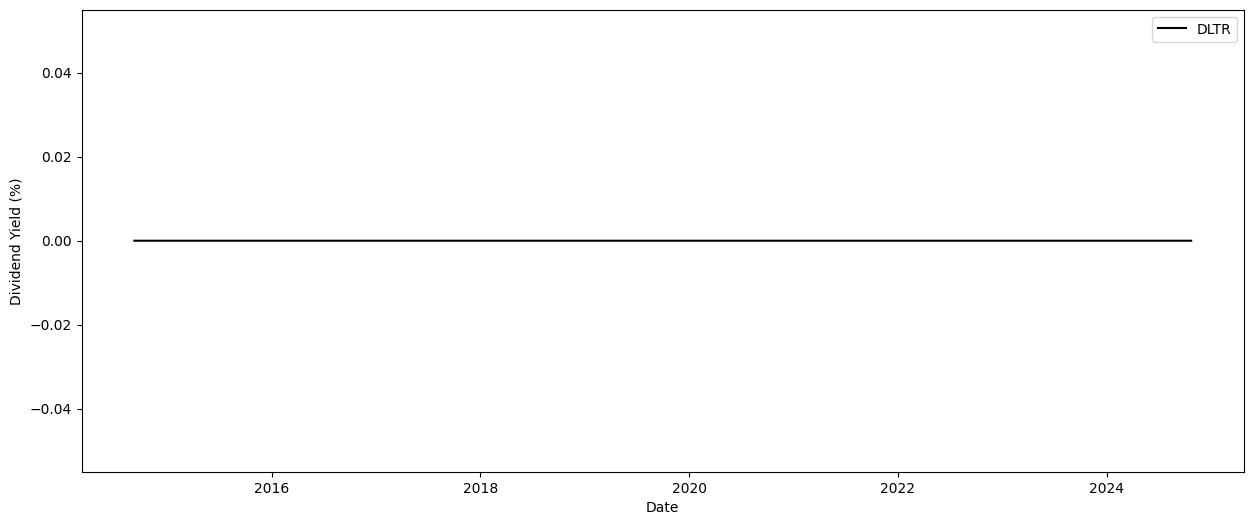

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


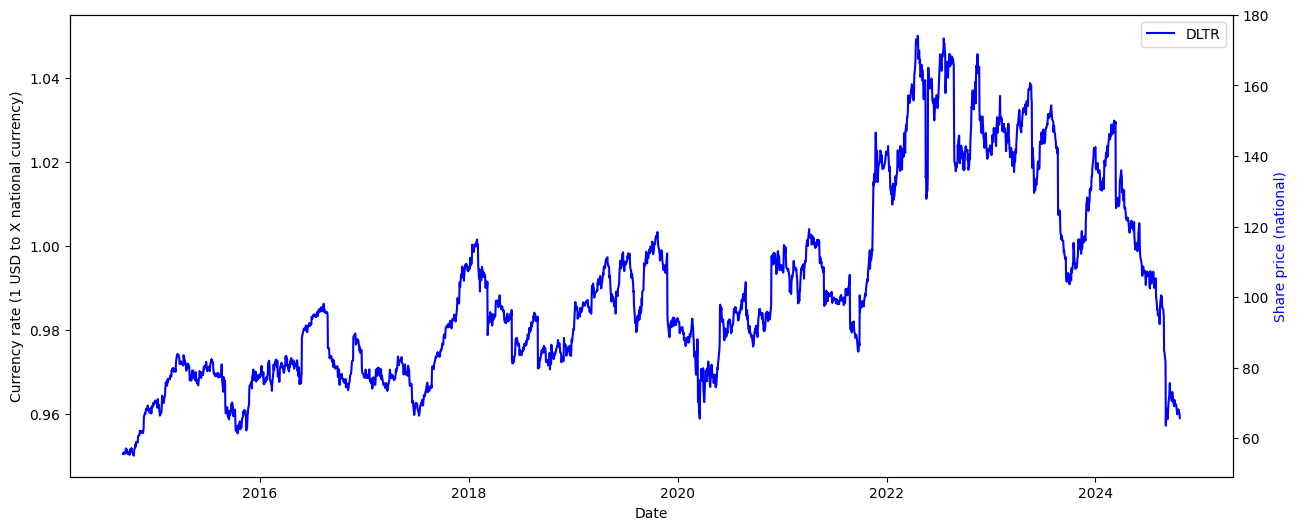

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

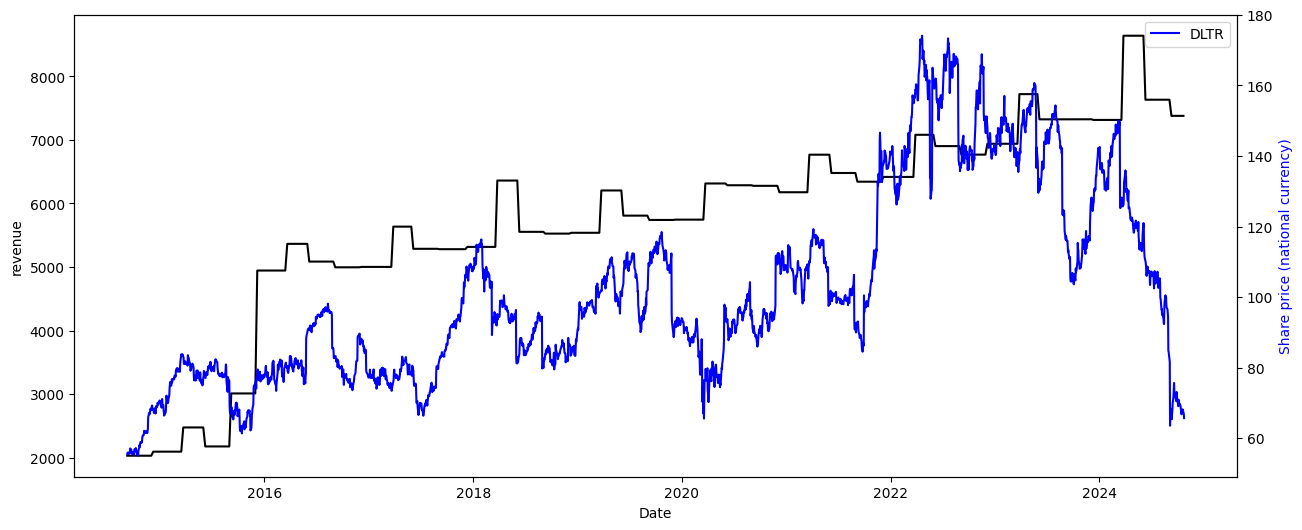

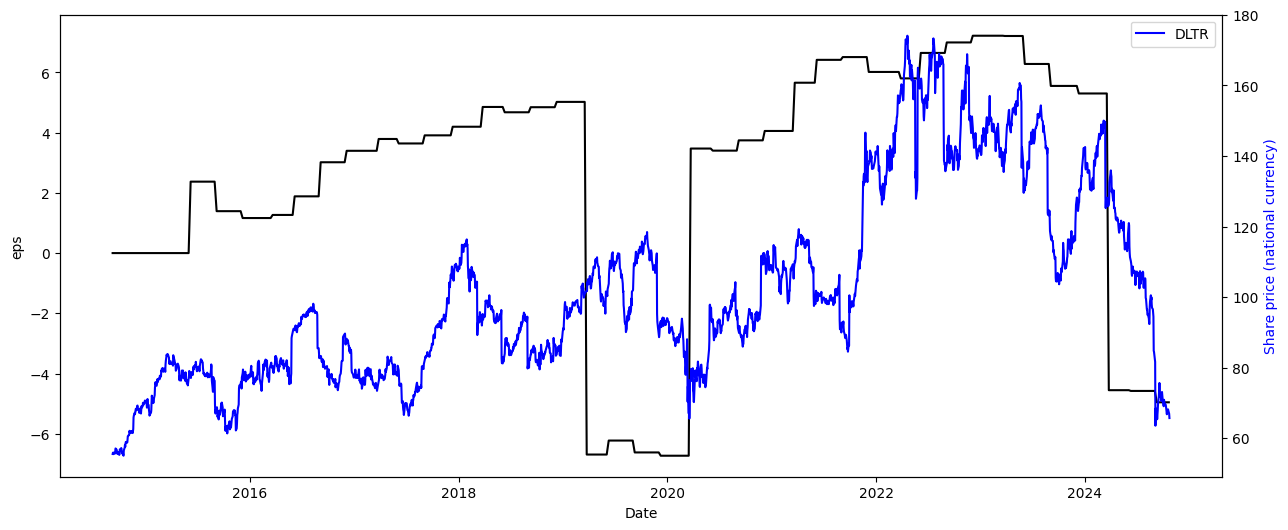

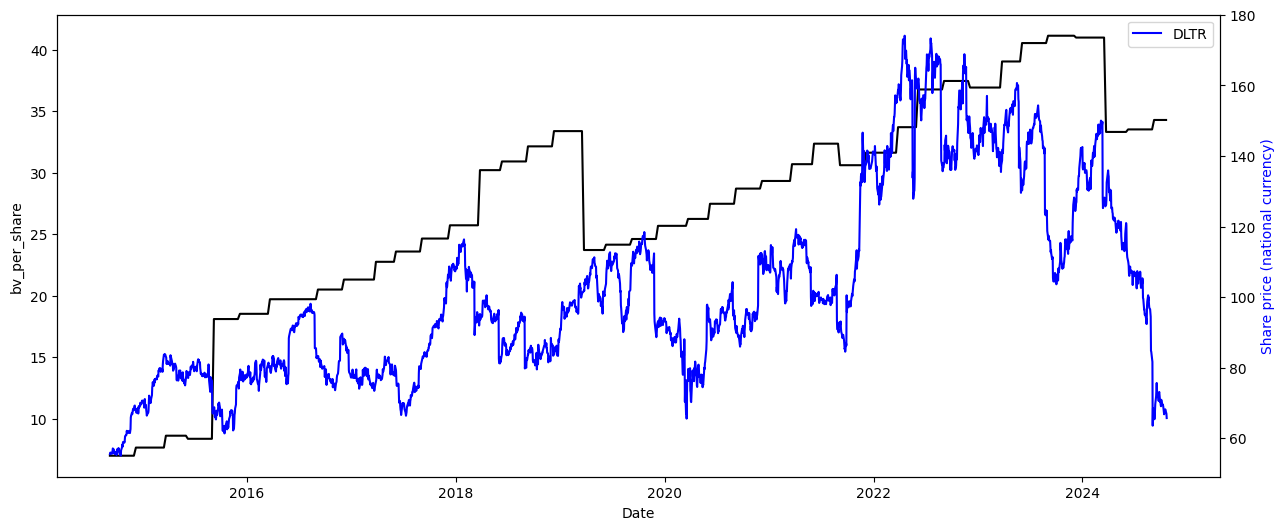

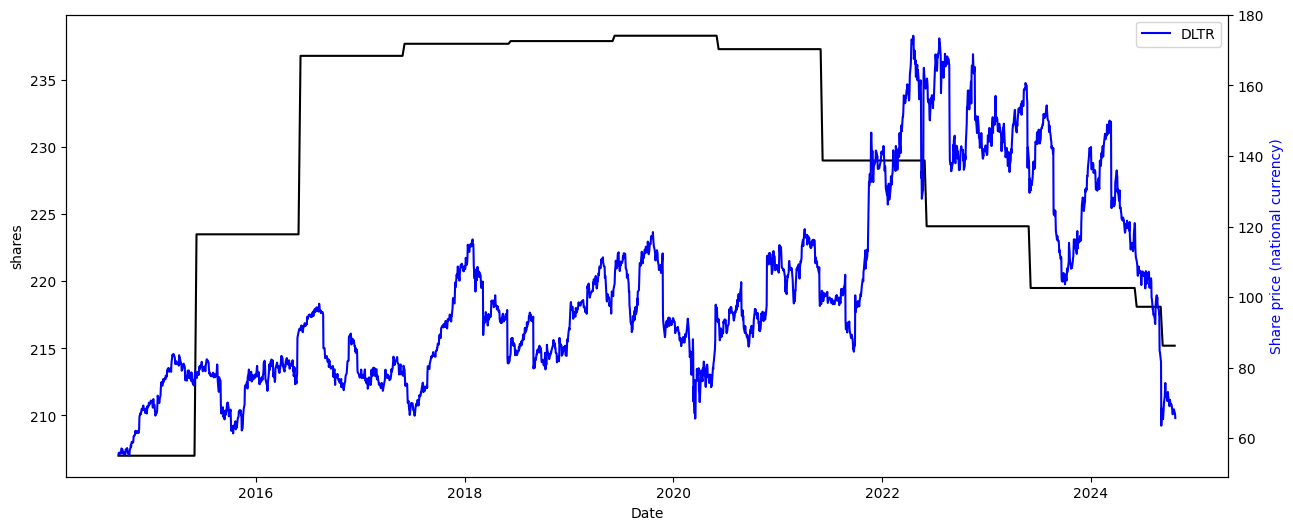

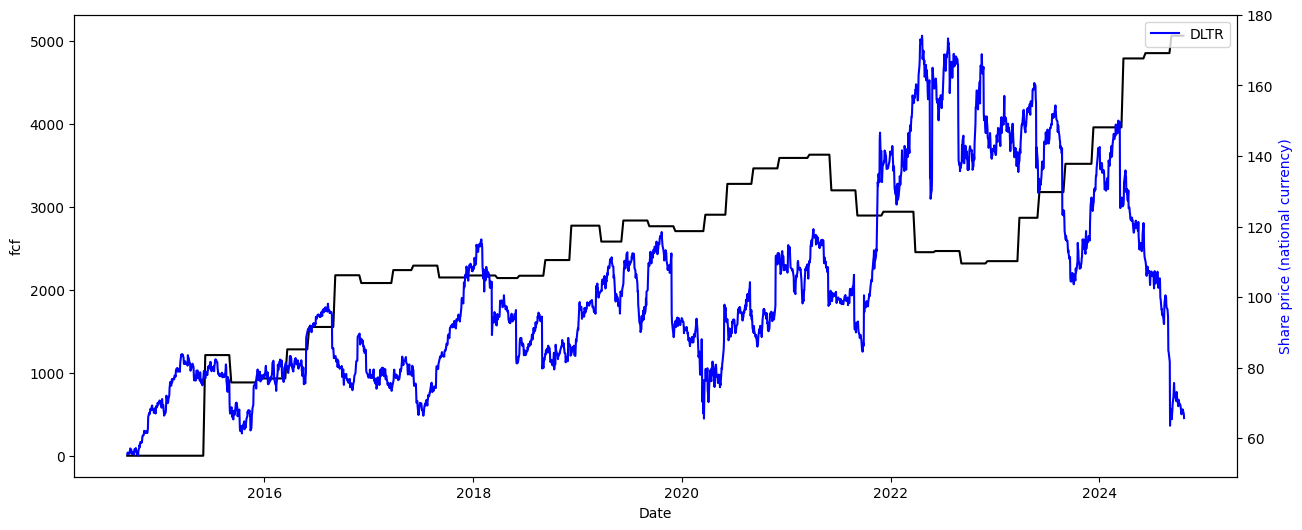

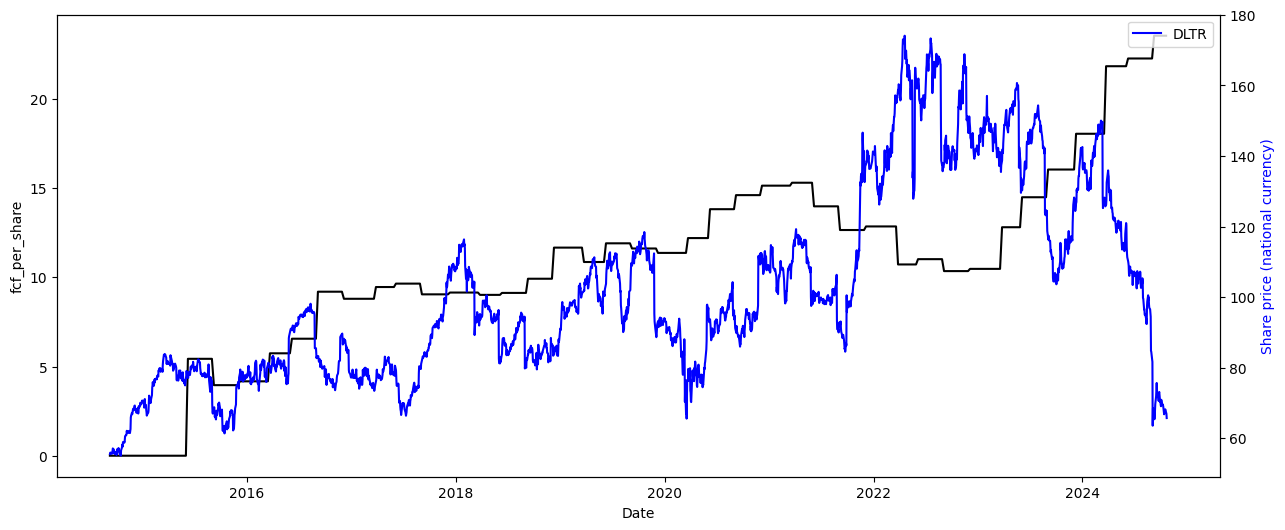

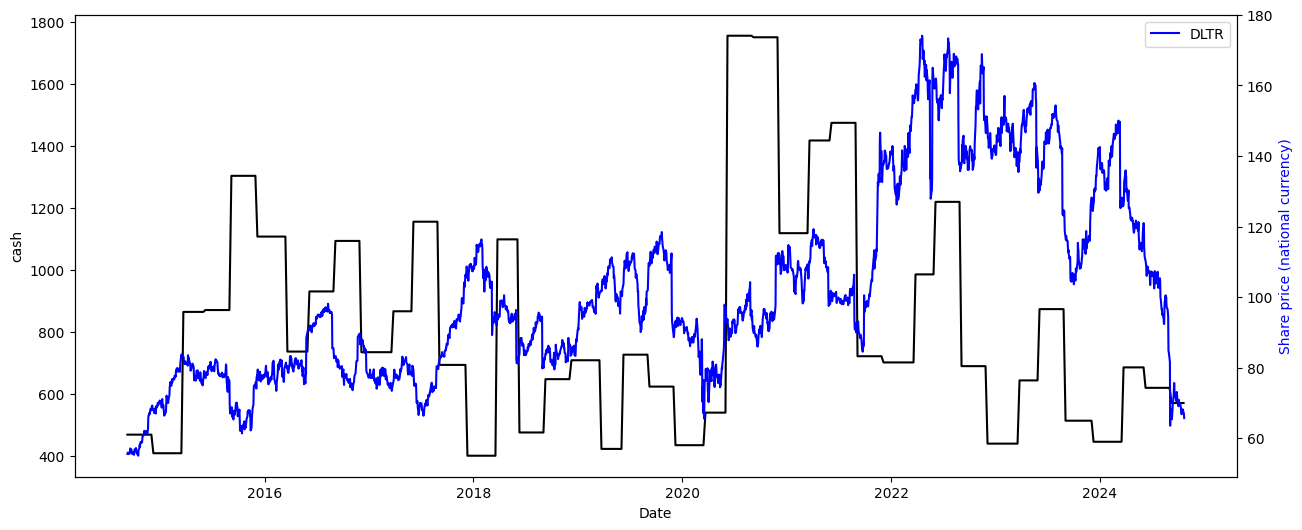

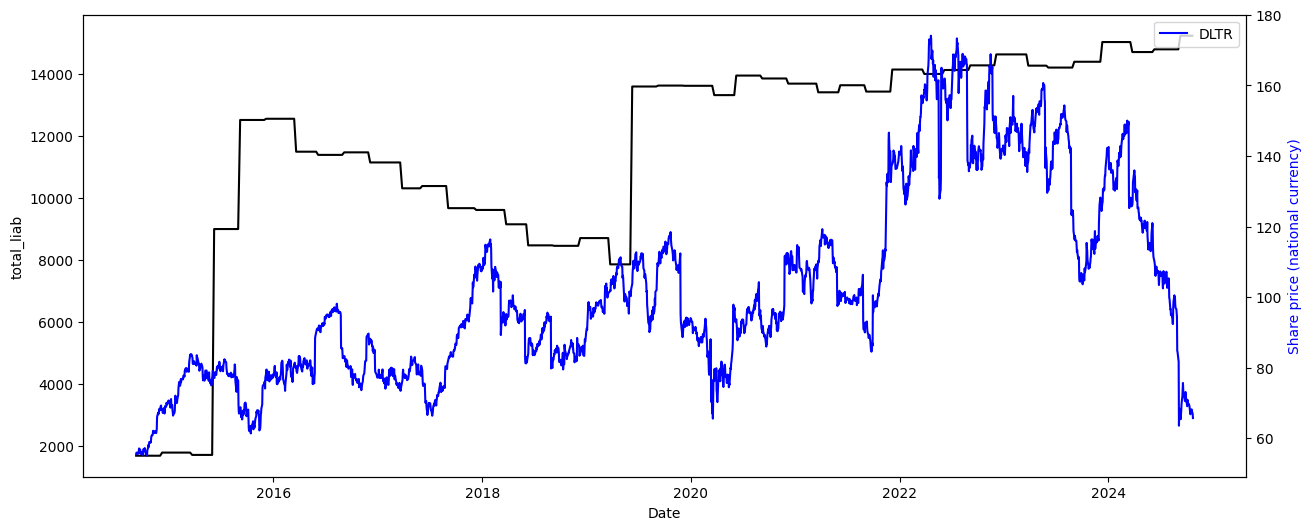

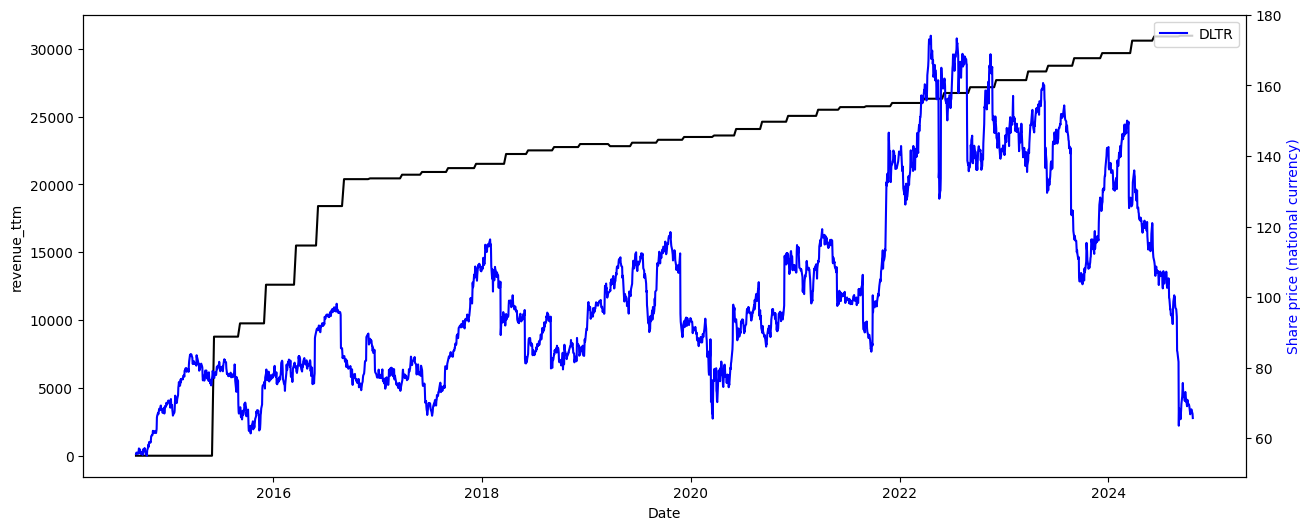

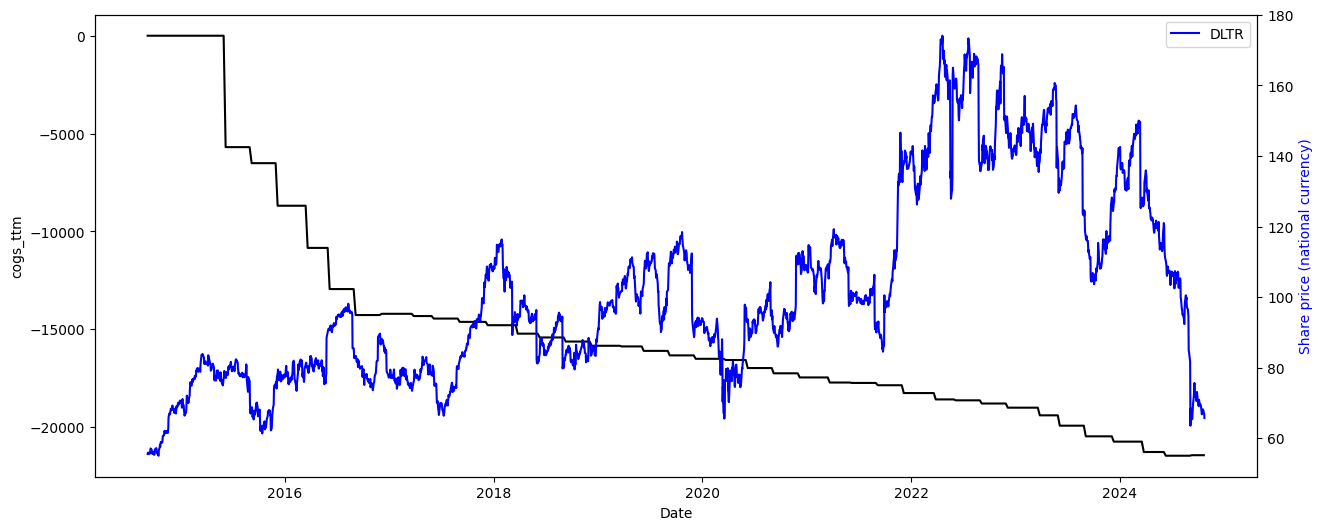

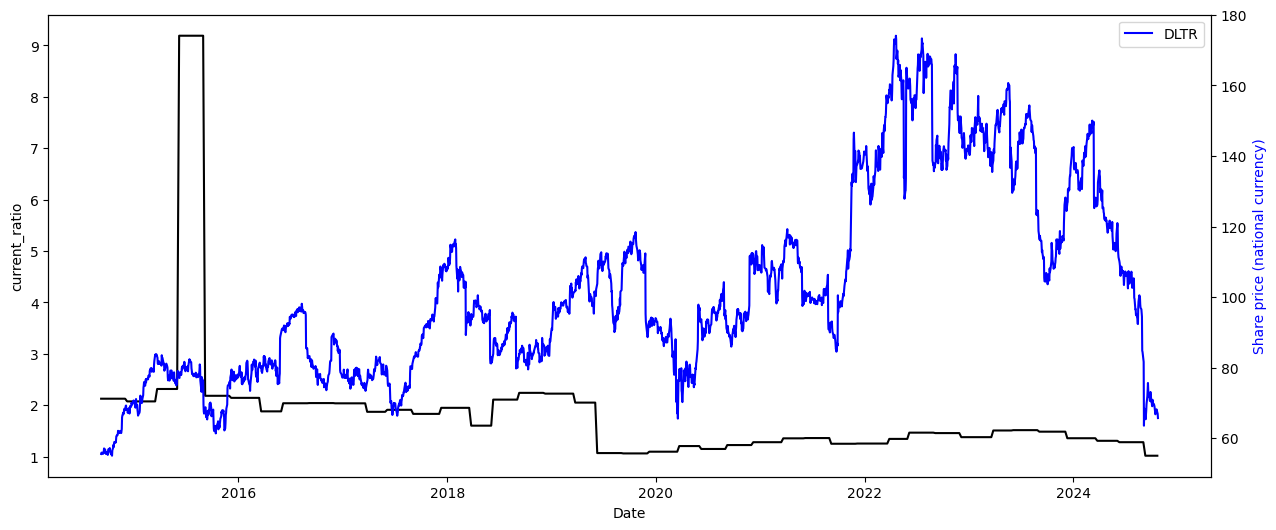

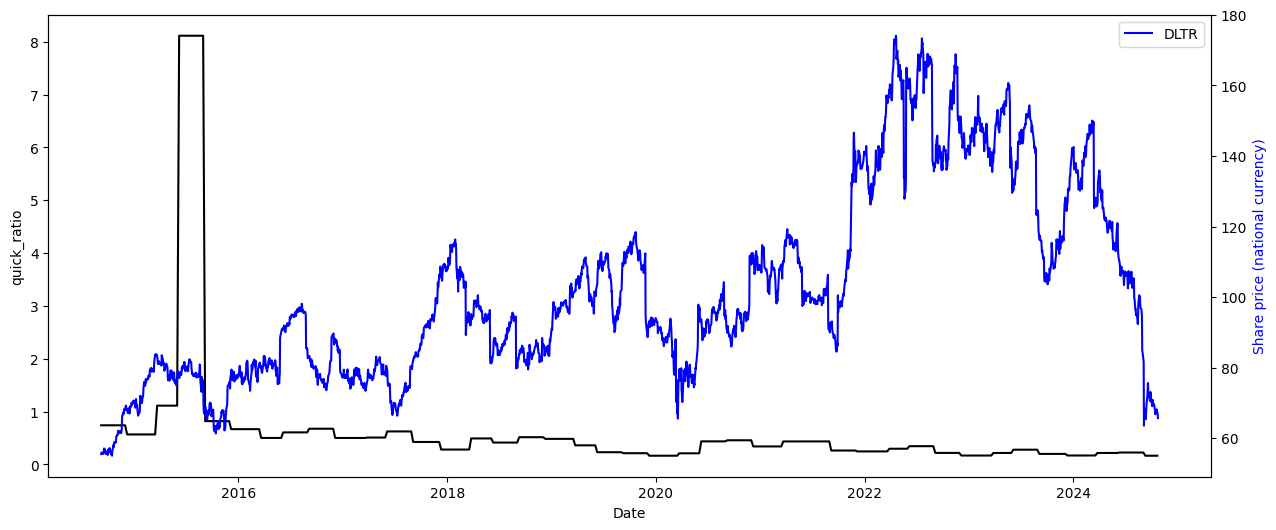

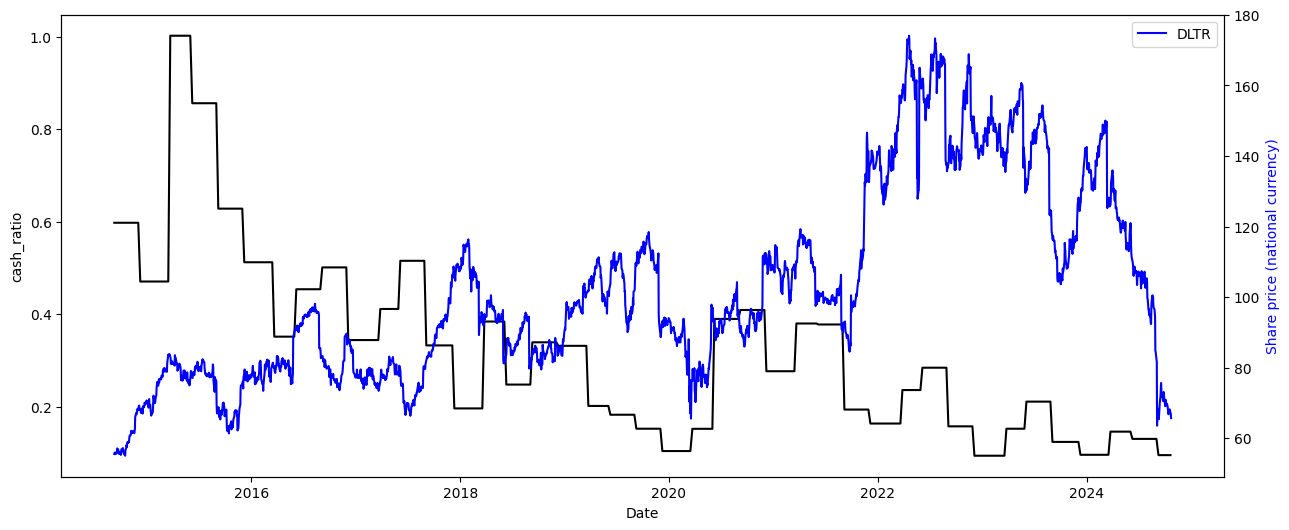

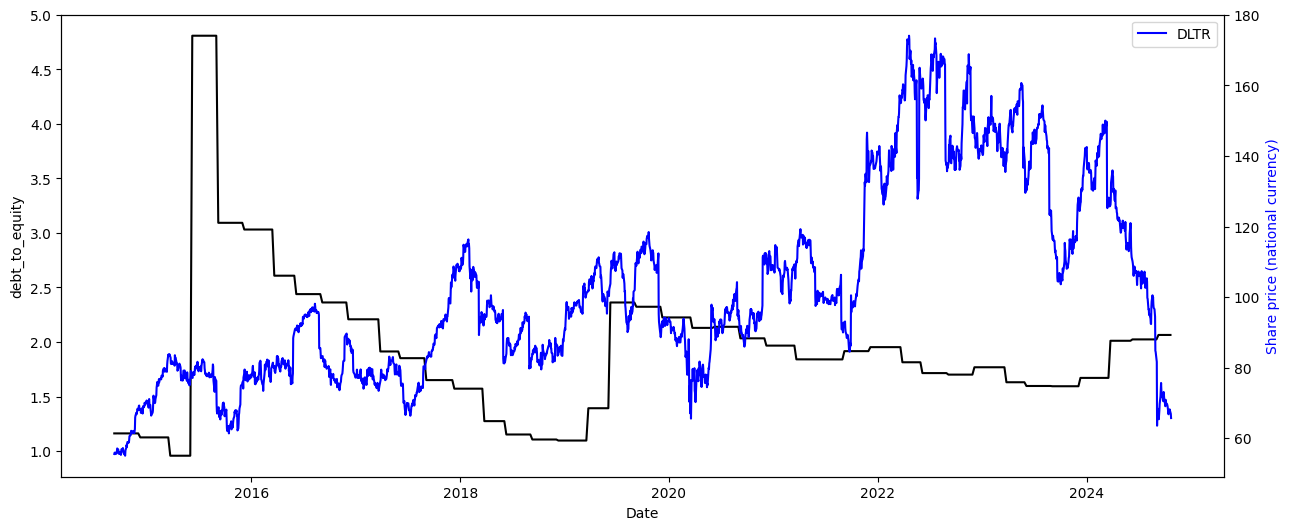

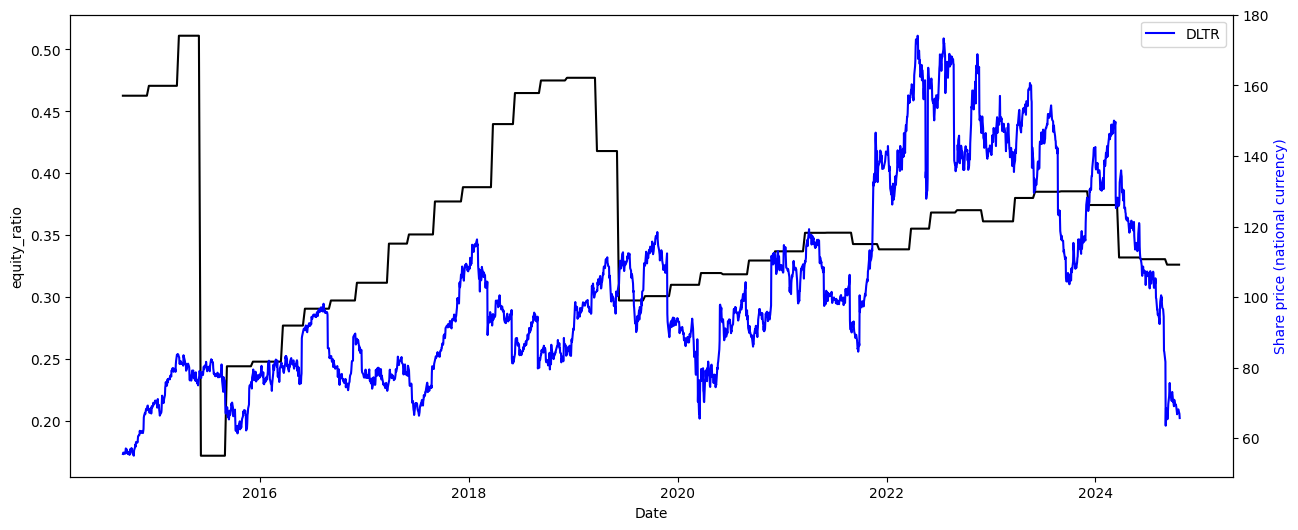

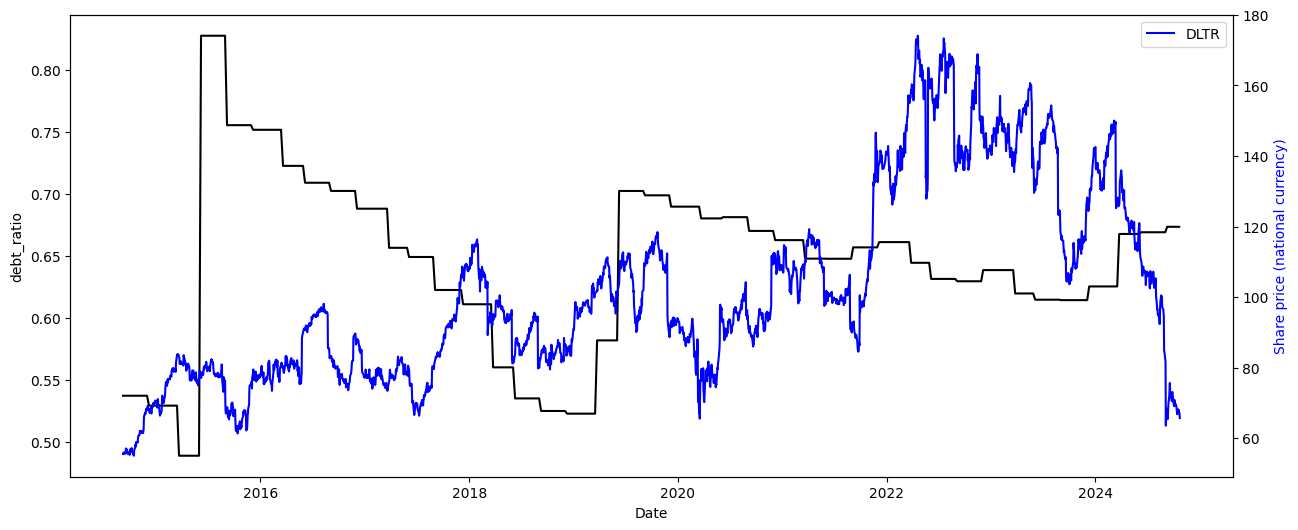

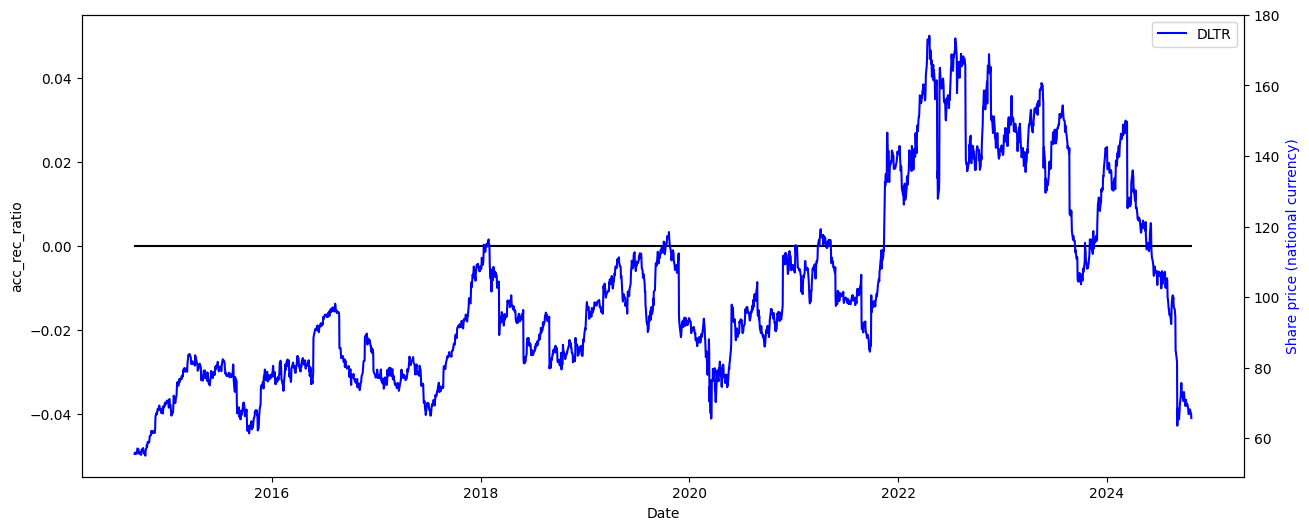

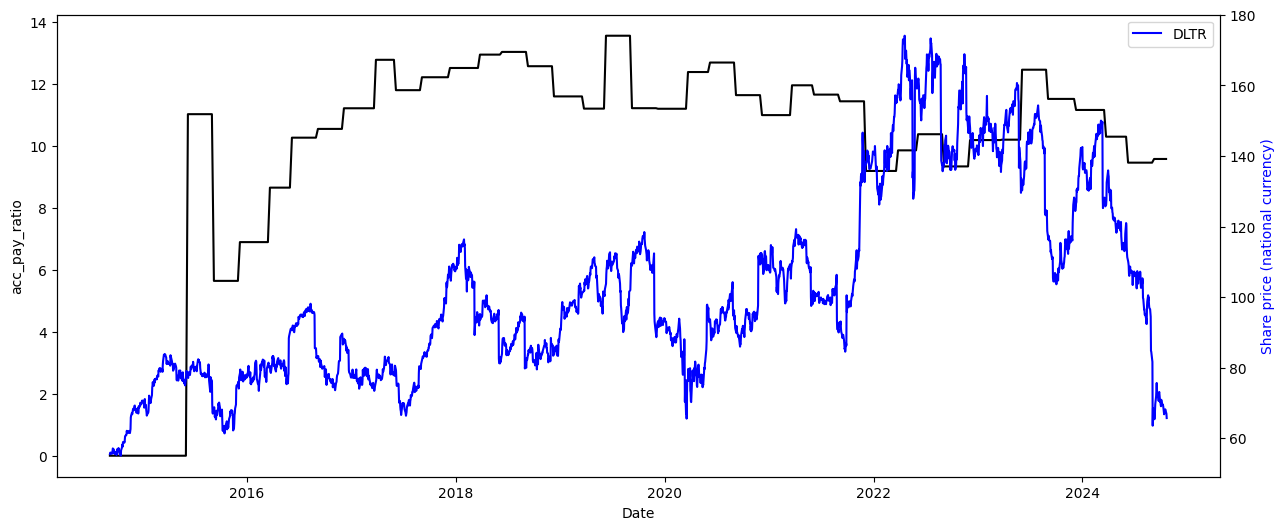

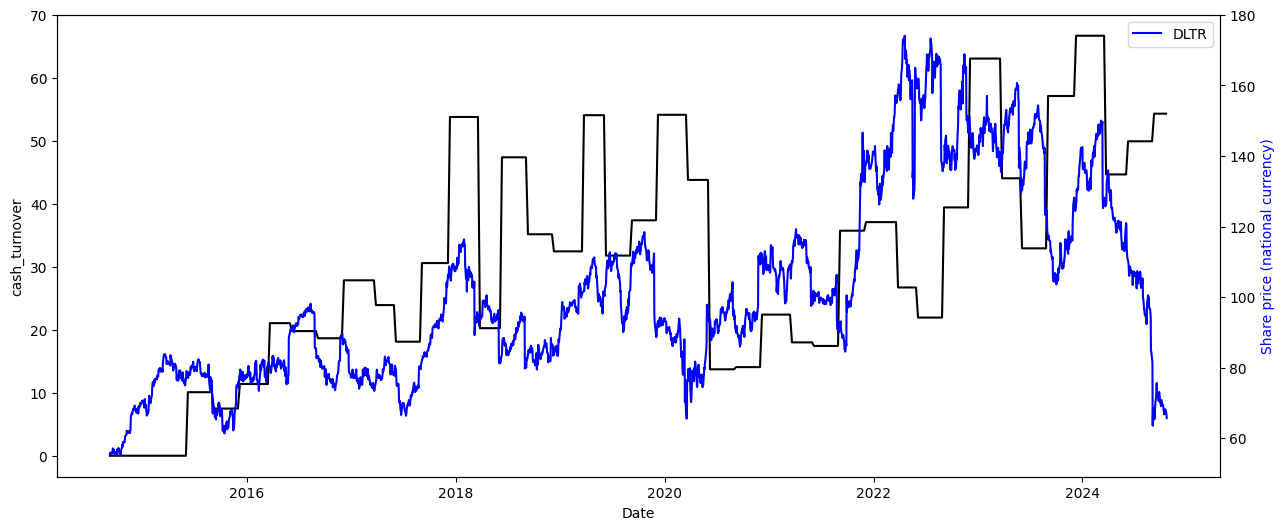

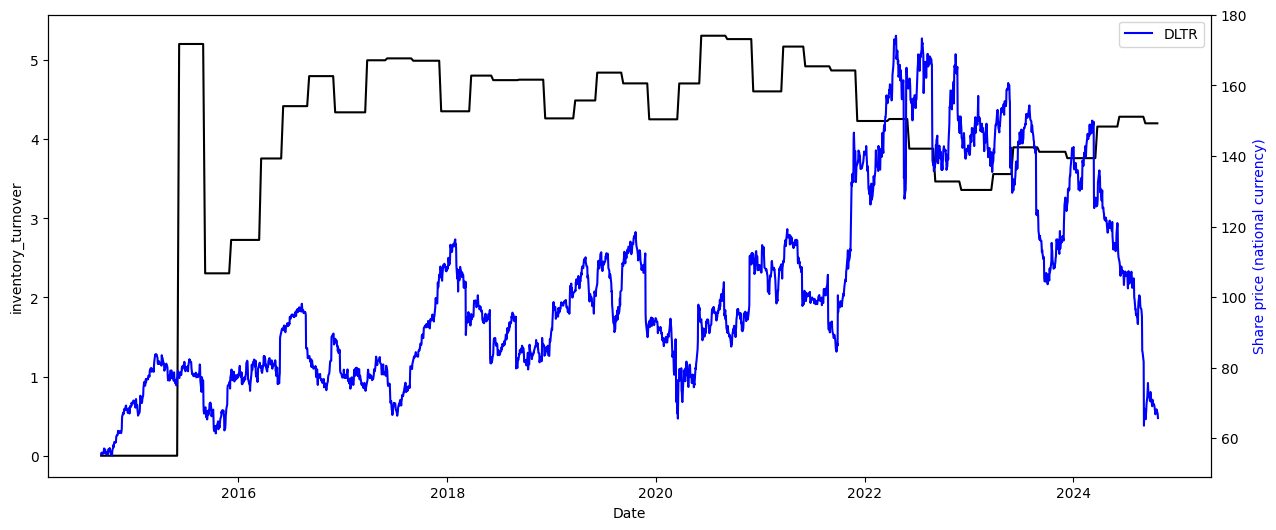

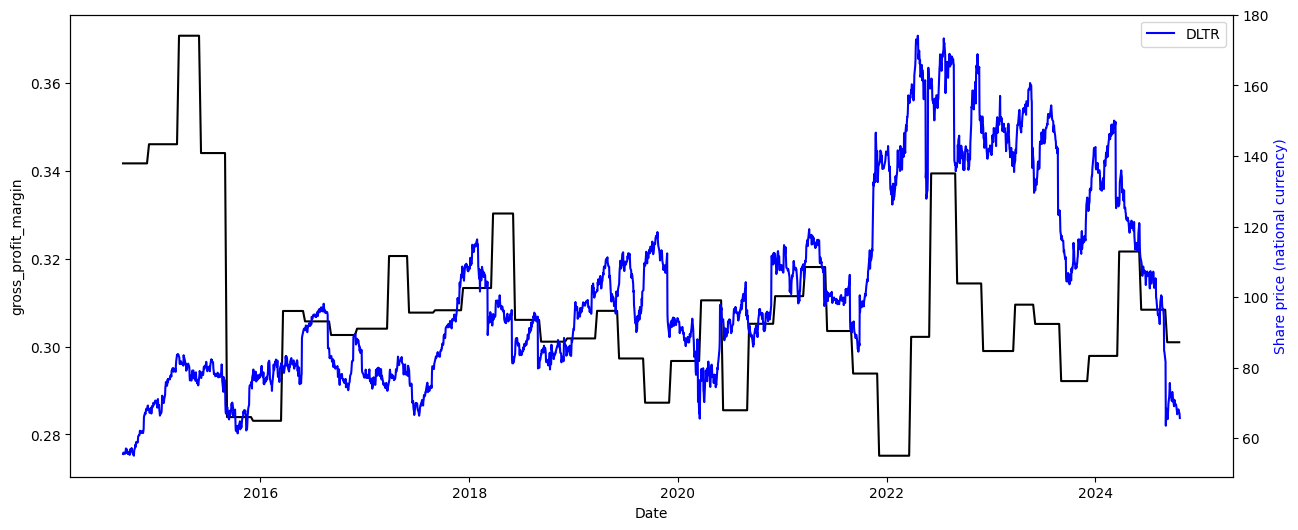

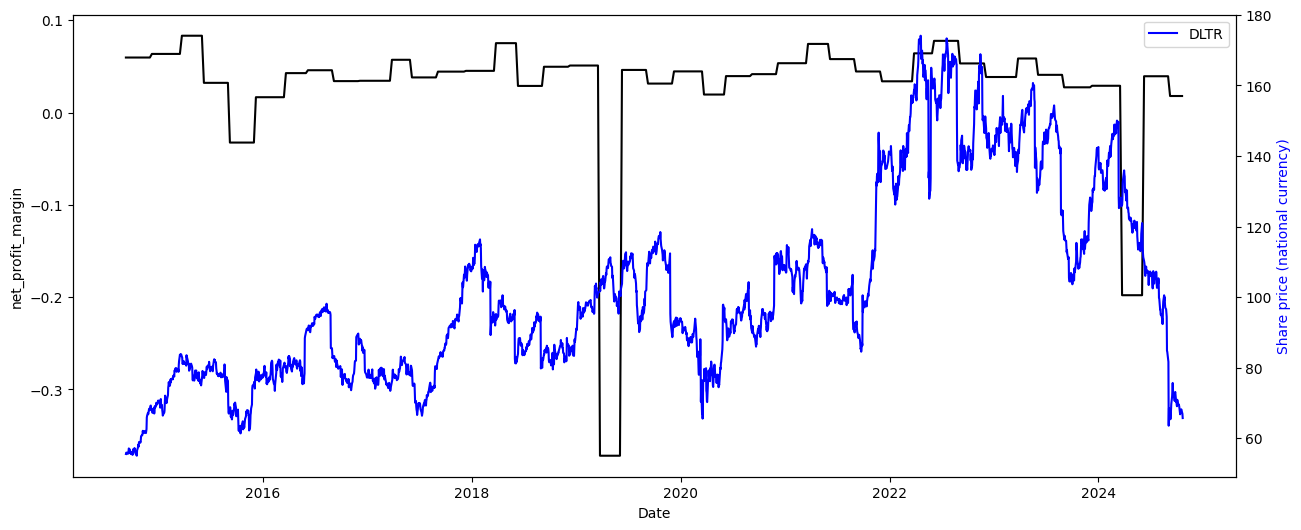

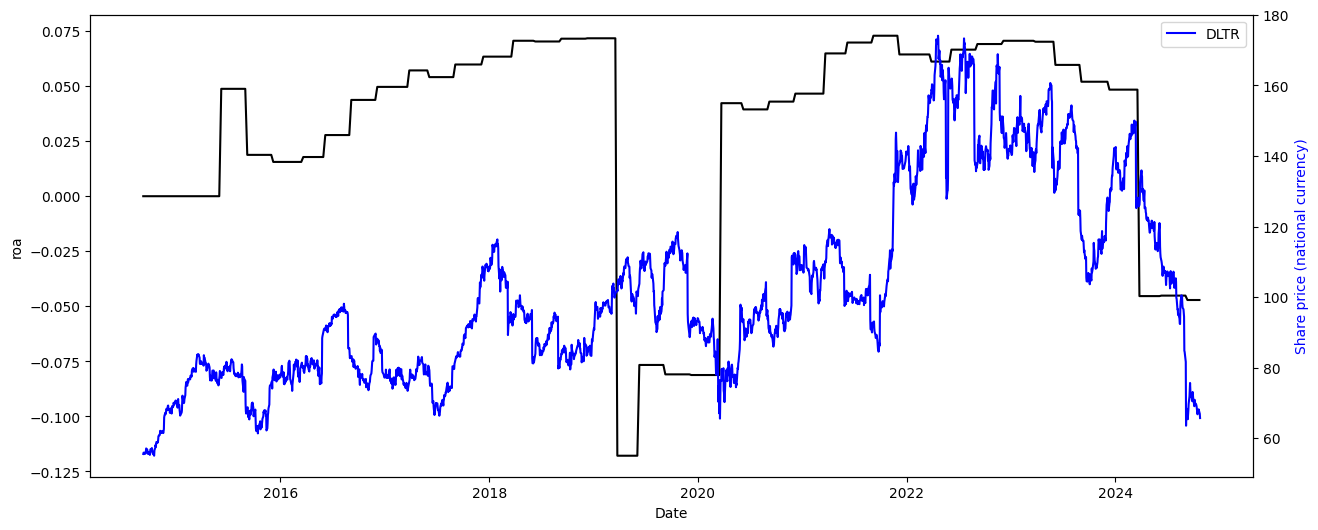

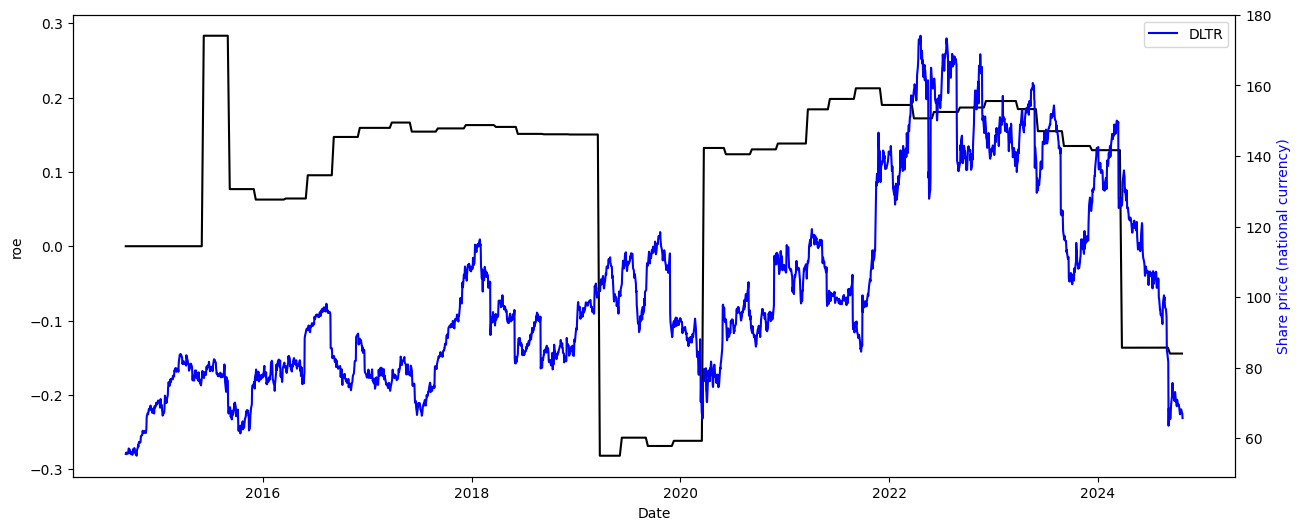

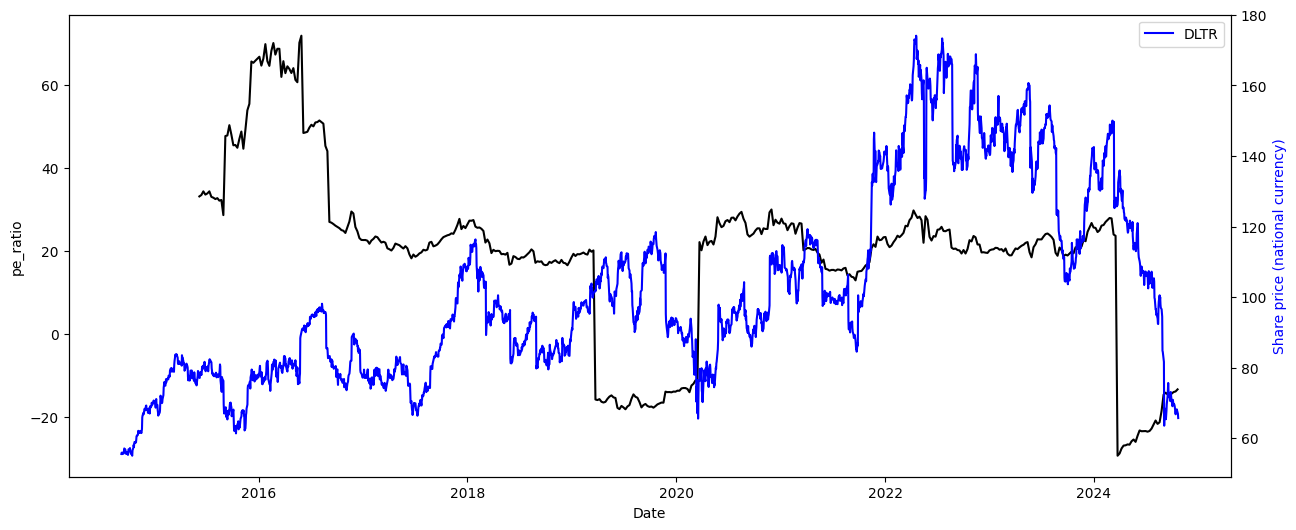

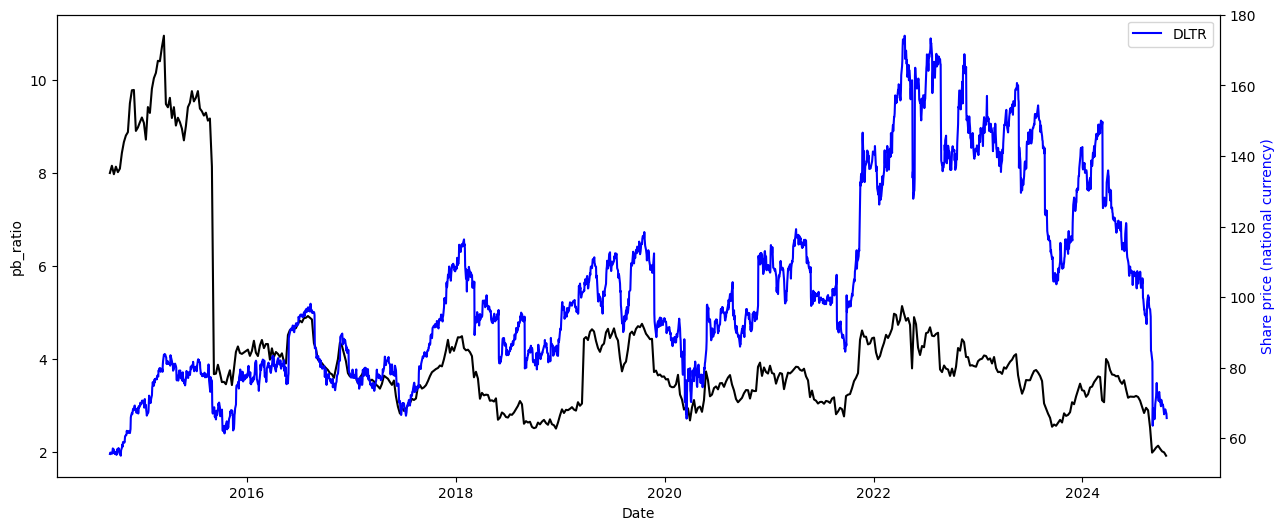

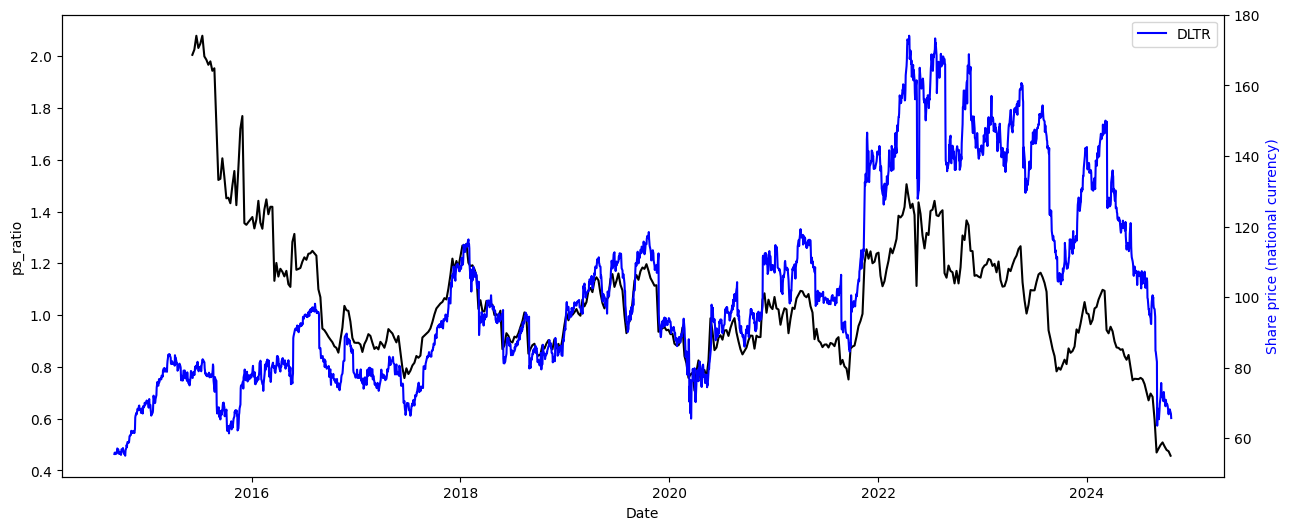

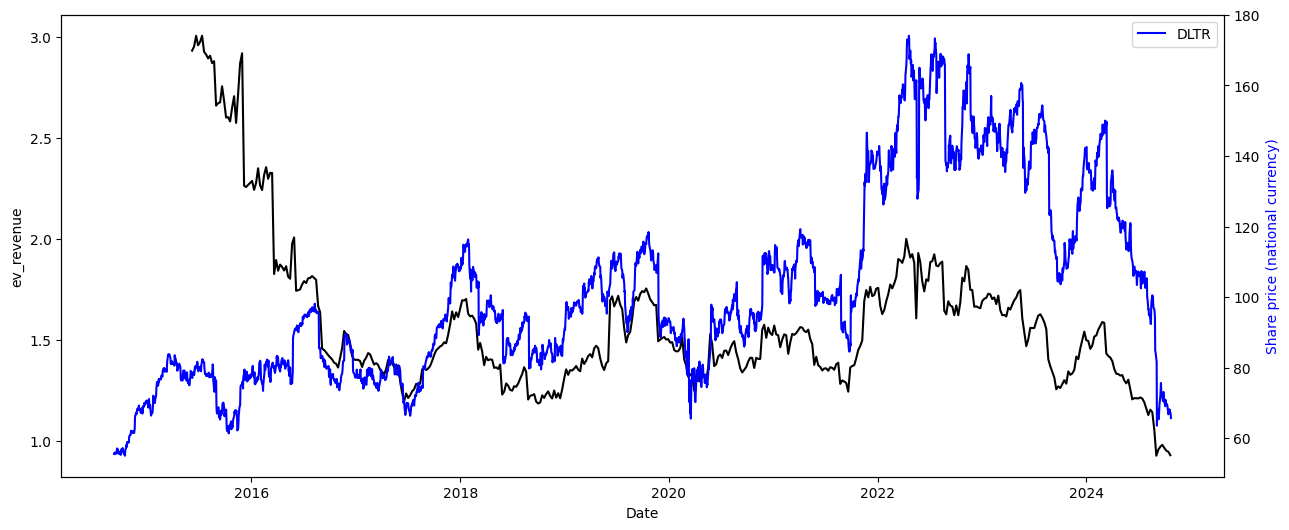

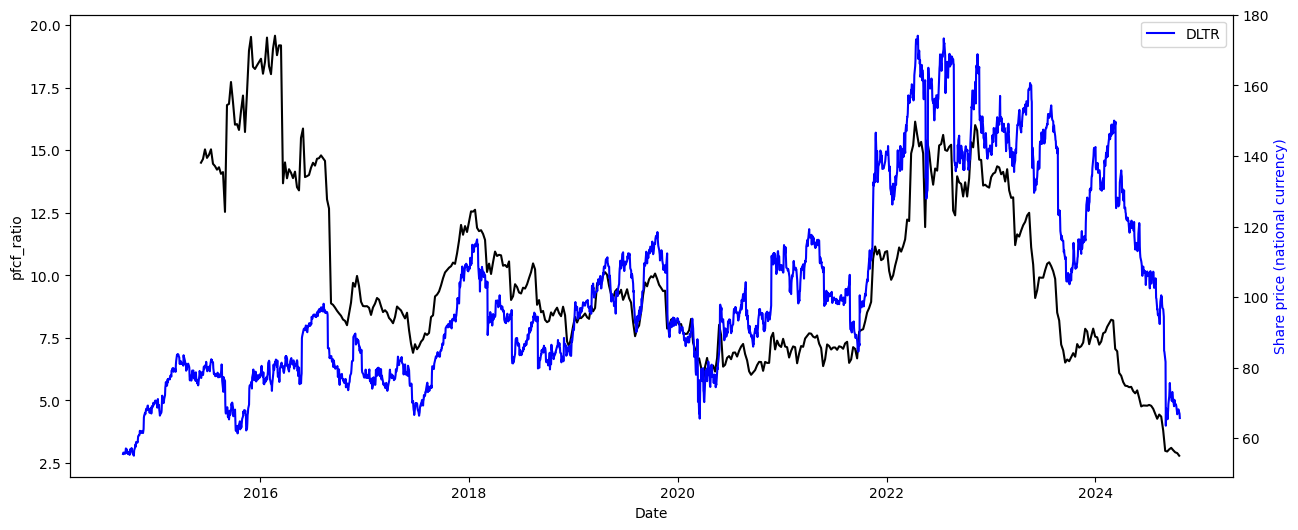

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

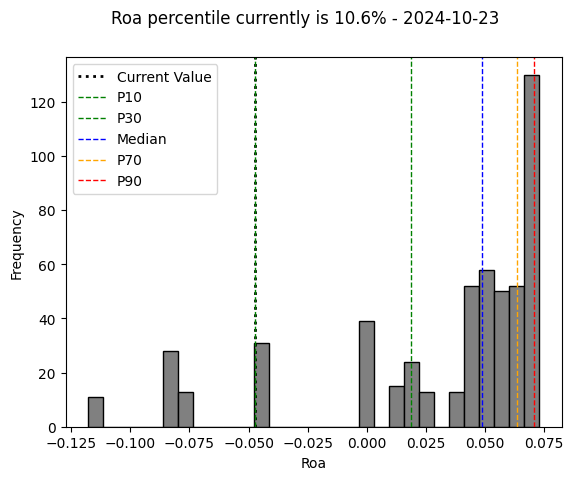

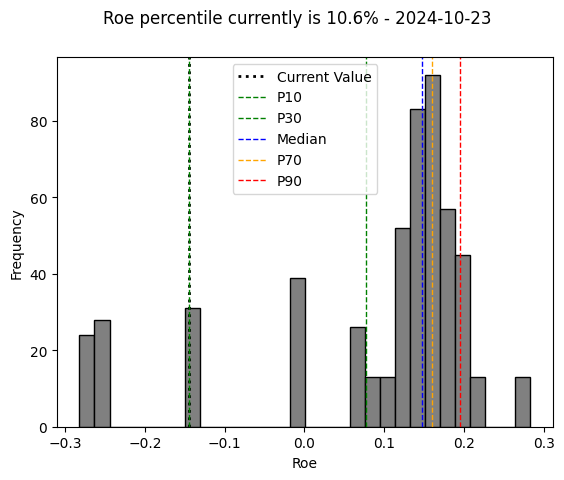

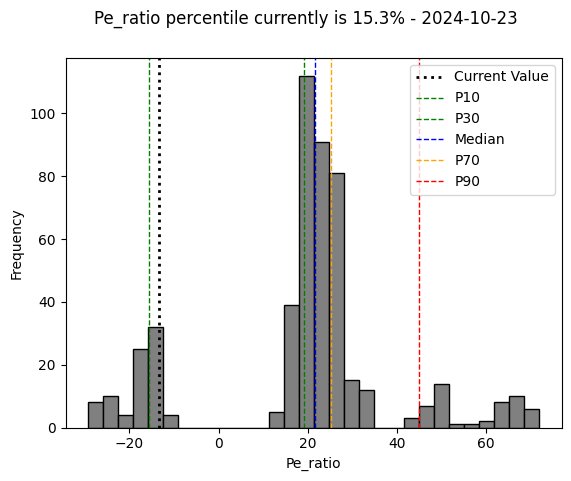

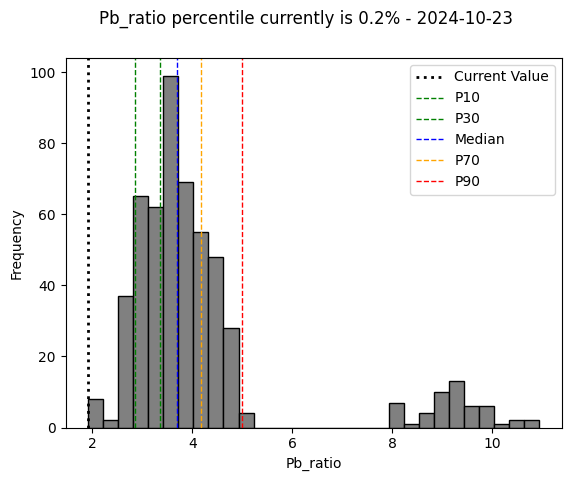

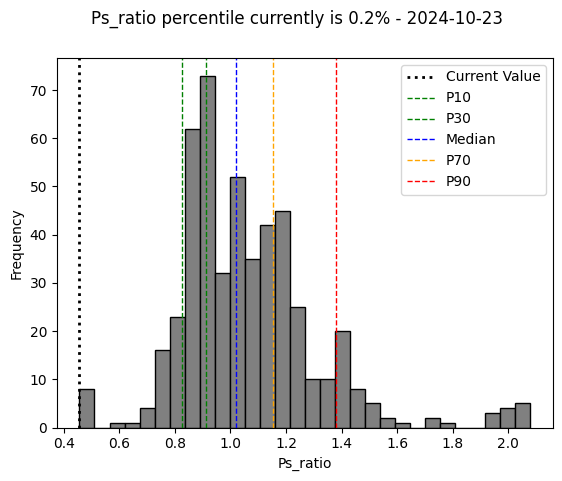

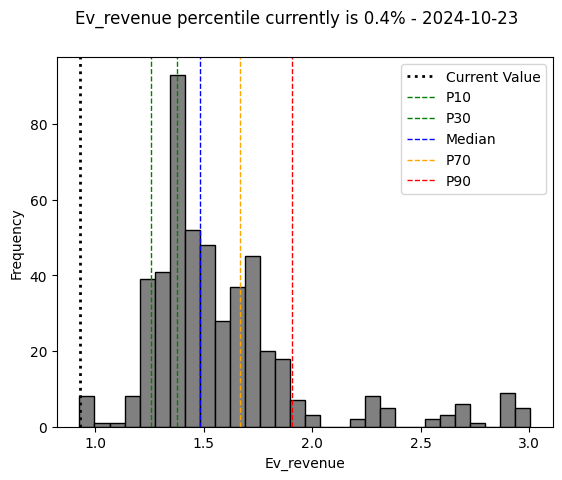

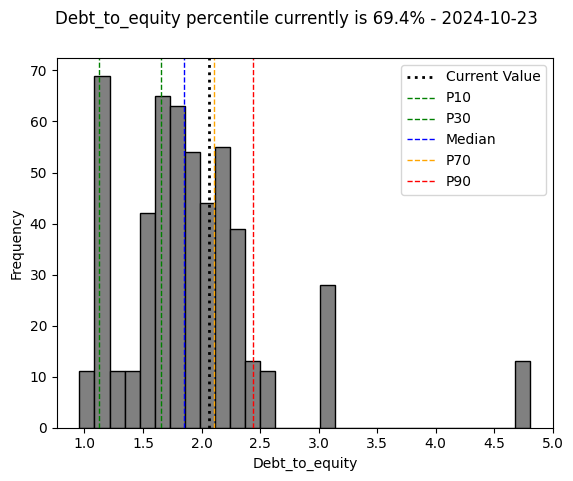

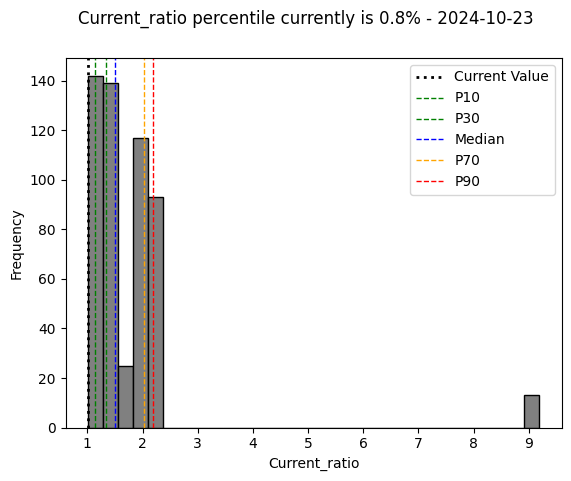

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.975183,0.610441,-0.168686,0.135448,0.038830,-0.140318,0.113324
roe,0.975183,1.000000,0.667057,-0.063687,0.255305,0.173476,0.021989,0.268541
pe_ratio,0.610441,0.667057,1.000000,0.206714,0.471823,0.519264,0.282377,0.248102
pb_ratio,-0.168686,-0.063687,0.206714,1.000000,0.848990,0.779703,0.131811,0.529691
ps_ratio,0.135448,0.255305,0.471823,0.848990,1.000000,0.945348,0.600332,0.626160
ev_revenue,0.038830,0.173476,0.519264,0.779703,0.945348,1.000000,0.762756,0.603335
debt_to_equity,-0.140318,0.021989,0.282377,0.131811,0.600332,0.762756,1.000000,0.593917
current_ratio,0.113324,0.268541,0.248102,0.529691,0.626160,0.603335,0.593917,1.000000


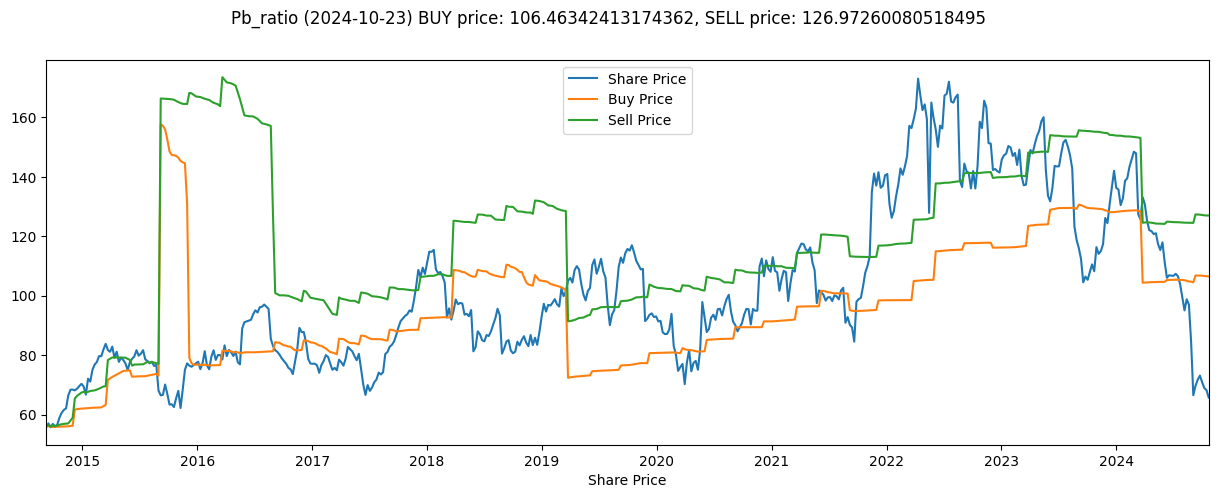

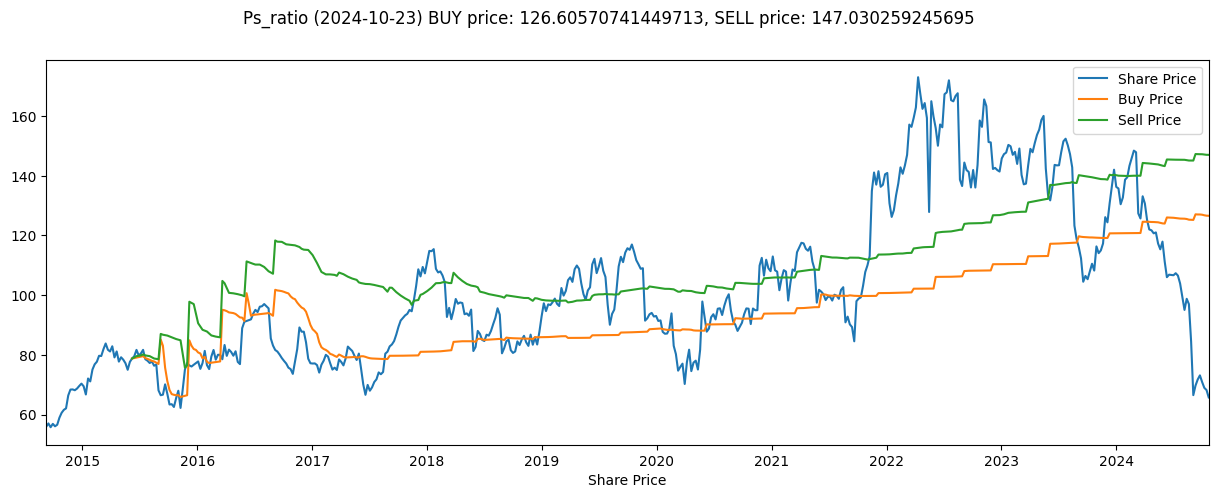

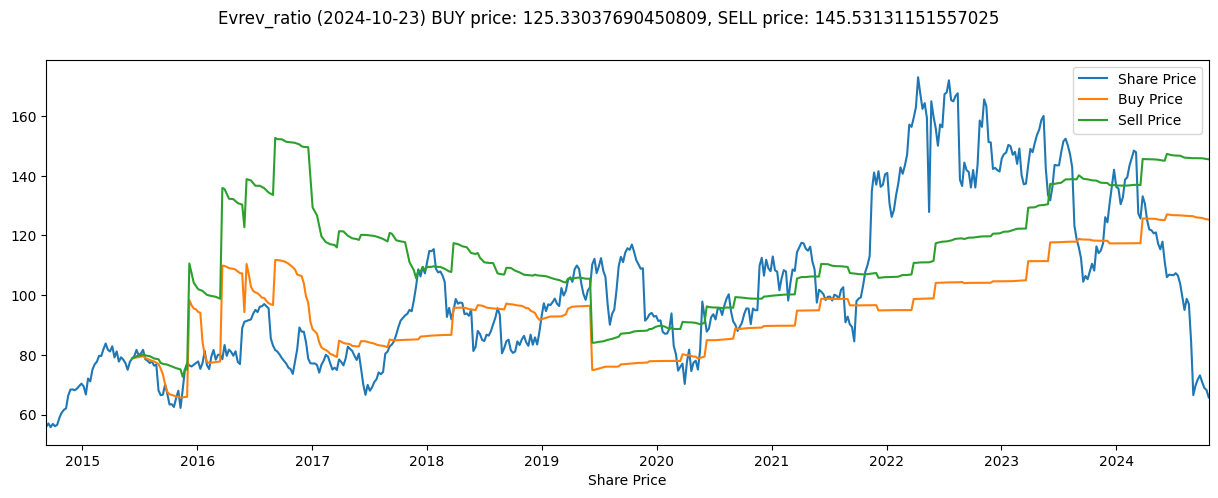

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)